In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.3/33.3 MB 27.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem
from rdkit.DataStructs import cDataStructs
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#**Upload Bioactivity data (pIC50) of molecules (smiles)**

In [3]:

df = pd.read_csv('Bioactivity_Data_clean.csv')
df

,Smiles,pIC50
0,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537
1,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677
2,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850
3,COc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n...,6.657577
4,COc1cc2ncc(N[C@H]3CC[C@H](O)CC3)nc2cc1OC,5.431798
...,...,...
2464,COc1cc2ncnc(Nc3ccccc3)c2cc1OC,7.537602
2465,COc1cc2ncnc(Nc3cccc(F)c3)c2cc1OC,8.420216
2466,COc1ccc2ncnc(Nc3cccc(Br)c3)c2c1OC,5.864231
2467,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2[C@H]2CC[C@H](O...,7.080922


In [4]:
df = df.dropna ()
df

,Smiles,pIC50
0,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537
1,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677
2,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850
3,COc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n...,6.657577
4,COc1cc2ncc(N[C@H]3CC[C@H](O)CC3)nc2cc1OC,5.431798
...,...,...
2464,COc1cc2ncnc(Nc3ccccc3)c2cc1OC,7.537602
2465,COc1cc2ncnc(Nc3cccc(F)c3)c2cc1OC,8.420216
2466,COc1ccc2ncnc(Nc3cccc(Br)c3)c2c1OC,5.864231
2467,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2[C@H]2CC[C@H](O...,7.080922


#**FingerPrint & 2D Descriptors**

In [5]:
descriptors = []
for i, row in df.iterrows():
    m = Chem.MolFromSmiles(str(row["Smiles"]))
    desc = []

    # calculate hashed atom pair fingerprint
    fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(m)
    desc.extend([int(x) for x in fp.ToBitString()])

    # calculate RDK fingerprint
    fp = Chem.RDKFingerprint(m)
    desc.extend(fp)

    # calculate additional molecular descriptors
    desc.append(Descriptors.MolWt(m))
    desc.append(Descriptors.MolLogP(m))
    desc.append(rdMolDescriptors.CalcNumHBA(m))
    desc.append(rdMolDescriptors.CalcNumHBD(m))
    desc.append(Descriptors.TPSA(m))
    desc.append(rdMolDescriptors.CalcFractionCSP3(m))
    desc.append(rdMolDescriptors.CalcNumRotatableBonds(m))
    desc.append(rdMolDescriptors.CalcNumAromaticRings(m))
    desc.append(rdMolDescriptors.CalcNumHeterocycles(m))

    descriptors.append(desc)


[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION WARNING: please use AtomPairGenerator
[05:37:55] DEPRECATION W

In [6]:
# Convert the descriptors list to a Pandas dataframe
df2 = pd.DataFrame(descriptors)
df2.to_csv('decriptors.csv', index=False)
df2

,0,1,2,3,4,5,6,7,8,9,...,4095,4096,4097,4098,4099,4100,4101,4102,4103,4104
0,1,1,1,0,1,1,0,0,1,0,...,0,440.463,4.0286,7,2,118.81,0.125000,7,5,2
1,0,0,0,0,1,0,0,0,0,0,...,1,337.810,4.5994,3,2,54.02,0.052632,5,3,1
2,1,0,0,0,0,0,0,0,0,0,...,1,235.290,3.2419,3,1,37.81,0.066667,3,3,1
3,0,0,0,0,0,0,0,0,0,0,...,1,427.291,5.0545,6,1,69.04,0.095238,4,4,2
4,1,1,0,0,1,1,1,0,0,0,...,1,303.362,2.3624,6,2,76.50,0.500000,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0,0,0,0,0,0,0,0,0,0,...,0,281.315,3.3906,5,1,56.27,0.125000,4,3,1
2465,0,0,0,0,0,0,0,0,0,0,...,0,299.305,3.5297,5,1,56.27,0.125000,4,3,1
2466,0,0,0,0,0,0,0,0,0,0,...,0,360.211,4.1531,5,1,56.27,0.125000,4,3,1
2467,1,1,1,1,1,1,1,0,0,0,...,0,368.412,3.6308,6,1,73.06,0.350000,4,3,2


In [10]:
X = df2
y = df["pIC50"]

#**Split data into training and test sets**

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# **QSAR Modell RandomForestRegressor**

In [12]:
# train QSAR model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [13]:
# predict bioactivity on test set
y_pred = model.predict(X)

In [14]:
# evaluate model performance
print("R^2:", model.score(X_test, y_test))

R^2: 0.9489283858045139


In [15]:
import matplotlib.pyplot as plt
import numpy as np

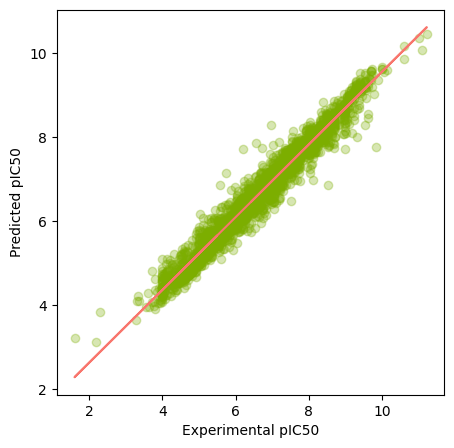

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=y, y=y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y,p(y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.savefig('regression_curve.pdf')

#**Define a function to calculate the descriptors of a new molecule and Predict pIC50**

In [ ]:
def predict_bioactivity(smiles):
    m = Chem.MolFromSmiles(smiles)
    desc = []

    # calculate hashed atom pair fingerprint
    fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(m)
    desc.extend([int(x) for x in fp.ToBitString()])

    # calculate RDK fingerprint
    fp = Chem.RDKFingerprint(m)
    desc.extend(fp)

    # calculate additional molecular descriptors
    desc.append(Descriptors.MolWt(m))
    desc.append(Descriptors.MolLogP(m))
    desc.append(rdMolDescriptors.CalcNumHBA(m))
    desc.append(rdMolDescriptors.CalcNumHBD(m))
    desc.append(Descriptors.TPSA(m))
    desc.append(rdMolDescriptors.CalcFractionCSP3(m))
    desc.append(rdMolDescriptors.CalcNumRotatableBonds(m))
    desc.append(rdMolDescriptors.CalcNumAromaticRings(m))
    desc.append(rdMolDescriptors.CalcNumHeterocycles(m))

    descriptors.append(desc)
    return desc

# predict bioactivity of new molecule (Campesterol)
smiles = "CCC(=C(C1=CC=C(C=C1)O)C2=CC=C(C=C2)OCCN(C)C)C3=CC=CC=C3"
X_new = np.array(predict_bioactivity(smiles)).reshape(1, -1)

# Print the selected features
#print(selected_features)
bioactivity = model.predict(X_new)
print("Predicted bioactivity:", bioactivity)

Predicted bioactivity: [8.31563077]


#**Convert pIC50 to IC50 (nm)**

In [ ]:
pIC50 = bioactivity
IC50 = (10**-pIC50)*(10**9)
print("IC50:", IC50, "nM")

IC50: [4.83469669] nM


# **QSAR Model Artificial Neural Network**

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the ANN model
model = MLPRegressor(hidden_layer_sizes=(100, 50),  # Example: Two layers with 100 and 50 neurons
                     activation='relu',            # Activation function
                     solver='adam',                # Optimization algorithm
                     max_iter=1000,                # Maximum number of iterations
                     random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("ANN Model R^2 Score:", score)


ANN Model R^2 Score: 0.4847909705454202


# **Support Vector Machine**

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Radial basis function kernel
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("SVM Model R^2 Score:", score)


SVM Model R^2 Score: 0.6692917866087185
